# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from  sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch.csv',low_memory=False)

In [3]:
#Convert column with mixed types to object type.

ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]] = ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]].astype(object)
g = ch_df.columns.to_series().groupby(ch_df.dtypes).groups
g

{dtype('int64'): Index([u'Unnamed: 0', u'HH1', u'HH2', u'LN', u'UF1', u'UF2', u'UF4', u'UF6',
        u'UF7', u'UF8D', u'UF8M', u'UF8Y', u'UF9', u'UF10', u'UF11', u'HH6',
        u'HH7', u'HL4', u'CDOI', u'melevel', u'religion', u'zone', u'windex5',
        u'PSU', u'stratum'],
       dtype='object'),
 dtype('float64'): Index([u'UF12H', u'UF12M', u'UF13H', u'UF13M', u'AG1D', u'AG1M', u'AG1Y',
        u'AG2', u'BR1', u'BR2',
        ...
        u'TN12_4', u'ED4A', u'ED4B', u'CDOB', u'CAGE', u'CAGE_6', u'CAGE_11',
        u'CAGED', u'chweight', u'wscore'],
       dtype='object', length=184),
 dtype('O'): Index([u'EC7AA', u'EC7AB', u'EC7AX', u'EC7AY', u'EC7BA', u'EC7BB', u'EC7BX',
        u'EC7BY', u'EC7CA', u'EC7CB', u'EC7CX', u'EC7CY', u'EC7DA', u'EC7DB',
        u'EC7DX', u'EC7DY', u'EC7EA', u'EC7EB', u'EC7EX', u'EC7EY', u'EC7FA',
        u'EC7FB', u'EC7FX', u'EC7FY', u'CA6A', u'CA6B', u'CA6C', u'CA6G',
        u'CA6H', u'CA6L', u'CA6M', u'CA6N', u'CA6O', u'CA6Q', u'CA6X', u'CA11A',
  

In [4]:
ch_df.describe()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
count,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,...,25192.000000,25192.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000
mean,13009.500000,765.843147,10.391959,6.122108,765.843147,10.391959,6.122108,2.889423,11.521255,14.596164,...,2.987496,984.930970,1.822815,1.581098,3.112845,0.968253,-0.107336,2.519217,765.843147,19.632601
std,7510.893988,429.034000,5.756146,3.017196,429.034000,5.756146,3.017196,2.431748,2.895621,7.412582,...,1.427527,1017.925784,0.879074,0.568260,1.603637,1.050827,0.968301,1.414660,429.034000,10.722314
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.574326,0.000000,1.000000,1.000000
25%,6505.250000,394.000000,5.000000,4.000000,394.000000,5.000000,4.000000,2.000000,9.000000,9.000000,...,2.000000,417.000000,1.000000,1.000000,2.000000,0.430426,-0.950428,1.000000,394.000000,10.000000
50%,13009.500000,764.000000,10.000000,5.000000,764.000000,10.000000,5.000000,2.000000,12.000000,15.000000,...,3.000000,909.000000,2.000000,2.000000,3.000000,0.677064,-0.260526,2.000000,764.000000,20.000000
75%,19513.750000,1138.000000,15.000000,7.000000,1138.000000,15.000000,7.000000,2.000000,14.000000,21.000000,...,4.000000,1384.000000,3.000000,2.000000,4.000000,1.161744,0.639379,4.000000,1138.000000,29.000000
max,26018.000000,1480.000000,20.000000,41.000000,1480.000000,20.000000,41.000000,39.000000,18.000000,30.000000,...,5.000000,9999.000000,9.000000,9.000000,6.000000,14.433318,3.008995,5.000000,1480.000000,37.000000


In [5]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
0,1,4,6,1,4,6,2,15,21,2,...,5.0,1656.0,3,1,4,1.262202,1.653178,5,1,1
1,1,5,5,1,5,5,2,12,21,2,...,3.0,1031.0,2,1,4,1.262202,1.973658,5,1,1
2,1,5,6,1,5,6,2,12,21,2,...,4.0,1320.0,2,1,4,1.262202,1.973658,5,1,1
3,1,6,3,1,6,3,2,11,21,2,...,1.0,164.0,3,1,4,1.262202,1.964425,5,1,1
4,1,7,4,1,7,4,2,16,21,2,...,4.0,1162.0,3,1,4,1.262202,1.638443,5,1,1


In [6]:
wm_df = pd.read_csv('wm.csv', low_memory = False)

In [7]:
wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]] = wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]].astype(object)
g = wm_df.columns.to_series().groupby(wm_df.dtypes).groups
g

{dtype('int64'): Index([u'Unnamed: 0', u'HH1', u'HH2', u'LN', u'WM1', u'WM2', u'WM4', u'WM5',
        u'WM6D', u'WM6M', u'WM6Y', u'WM7', u'WM8', u'WM9', u'HH6', u'HH7',
        u'WDOI', u'religion', u'zone', u'windex5', u'PSU', u'stratum'],
       dtype='object'),
 dtype('float64'): Index([u'WM10H', u'WM10M', u'WM11H', u'WM11M', u'WB1M', u'WB1Y', u'WB2',
        u'WB3', u'WB4', u'WB5',
        ...
        u'WAGEM', u'WDOBFC', u'WDOBLC', u'MSTATUS', u'CEB', u'CSURV', u'CDEAD',
        u'welevel', u'wmweight', u'wscore'],
       dtype='object', length=165),
 dtype('O'): Index([u'CM13', u'MN2A', u'MN2B', u'MN2C', u'MN2F', u'MN2G', u'MN2X', u'MN14A',
        u'MN14B', u'MN14C', u'MN14D', u'MN14E', u'MN14H', u'MN14X', u'MN14Z',
        u'MN17A', u'MN17B', u'MN17C', u'MN17F', u'MN17G', u'MN17H', u'MN17X',
        u'MN17Y', u'MN27A', u'MN27B', u'MN27C', u'MN27D', u'MN27E', u'MN27F',
        u'MN27G', u'MN27H', u'MN27I', u'MN27X', u'IS2A', u'IS2B', u'IS2C',
        u'IS2D', u'IS2E', u'IS2F', u

In [8]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CSURV,CDEAD,welevel,religion,zone,wmweight,wscore,windex5,PSU,stratum
0,1,1,3,1,1,3,16,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.580774,5,1,1
1,1,2,2,1,2,2,7,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.355768,5,1,1
2,1,3,2,1,3,2,7,21,2,2011,...,0.0,0.0,3.0,1,4,1.199659,1.351060,5,1,1
3,1,4,2,1,4,2,16,21,2,2011,...,4.0,0.0,3.0,1,4,1.199659,1.653178,5,1,1
4,1,6,2,1,6,2,11,21,2,2011,...,1.0,1.0,3.0,1,4,1.199659,1.964425,5,1,1


In [9]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'])

In [10]:
ch_wm_df.head()

,HH1,HH2,LN_x,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CSURV,CDEAD,welevel,religion_y,zone_y,wmweight,wscore_y,windex5_y,PSU_y,stratum_y
0,1,4,6,1,4,6,2,15,21,2,...,4.0,0.0,3.0,1,4,1.199659,1.653178,5,1,1
1,1,6,3,1,6,3,2,11,21,2,...,1.0,1.0,3.0,1,4,1.199659,1.964425,5,1,1
2,1,7,4,1,7,4,2,16,21,2,...,3.0,0.0,3.0,1,4,1.199659,1.638443,5,1,1
3,1,7,5,1,7,5,2,16,21,2,...,3.0,0.0,3.0,1,4,1.199659,1.638443,5,1,1
4,1,8,5,1,8,5,2,15,21,4,...,3.0,0.0,3.0,1,4,1.199659,1.229106,5,1,1


In [11]:
hh_df = pd.read_csv('hh.csv', low_memory = False)

In [12]:
hh_df.iloc[:,[36,41]] = hh_df.iloc[:,[36,41]].astype(object)
g = hh_df.columns.to_series().groupby(hh_df.dtypes).groups
g

{dtype('int64'): Index([u'Unnamed: 0', u'HH1', u'HH2', u'HH3', u'HH4', u'HH5D', u'HH5M',
        u'HH5Y', u'HH6', u'HH7', u'HH9', u'HH16', u'HH17', u'zone', u'windex5',
        u'PSU', u'stratum'],
       dtype='object'),
 dtype('float64'): Index([u'HH10', u'HH11', u'HH12', u'HH13', u'HH14', u'HH15', u'HH18H',
        u'HH18M', u'HH19H', u'HH19M', u'WS1', u'WS2', u'WS3', u'WS4', u'WS4AA',
        u'WS4AB', u'WS4B', u'WS5', u'WS6', u'WS8', u'WS9', u'WS10', u'WS11',
        u'HC1A', u'HC1B', u'HC1C', u'HC2', u'HC3', u'HC4', u'HC5', u'HC6',
        u'HC7', u'HC8A', u'HC8B', u'HC8C', u'HC8D', u'HC8E', u'HC8F', u'HC8G',
        u'HC8H', u'HC8I', u'HC8J', u'HC8K', u'HC8L', u'HC8M', u'HC8N', u'HC8O',
        u'HC9A', u'HC9B', u'HC9C', u'HC9D', u'HC9E', u'HC9F', u'HC9G', u'HC10',
        u'HC11', u'HC12', u'HC13', u'HC14A', u'HC14B', u'HC14C', u'HC14D',
        u'HC14E', u'HC14F', u'HC14G', u'HC14H', u'HC14I', u'HC15', u'TN1',
        u'TN2', u'CD6', u'CD8', u'CD9', u'CD_FLAG', u'CD11', u'CD12

In [13]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH9,...,SI1,HHSEX,religion,zone,helevel,hhweight,wscore,windex5,PSU,stratum
0,1,1,16,2,4,3,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.580774,5,1,1
1,1,2,7,2,4,3,2011,1,1,1,...,3.0,2.0,1.0,4,1.0,1.250765,1.355768,5,1,1
2,1,3,7,2,21,2,2011,1,1,1,...,3.0,2.0,1.0,4,2.0,1.250765,1.351060,5,1,1
3,1,4,15,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.653178,5,1,1
4,1,5,12,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,2.0,1.250765,1.973658,5,1,1


In [14]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'])

In [15]:
df.head()

,HH1,HH2,LN_x,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,SI1,HHSEX,religion,zone,helevel,hhweight,wscore,windex5,PSU,stratum
0,1,4,6,1,4,6,2,15,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.653178,5,1,1
1,1,6,3,1,6,3,2,11,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.964425,5,1,1
2,1,7,4,1,7,4,2,16,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.638443,5,1,1
3,1,7,5,1,7,5,2,16,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.638443,5,1,1
4,1,8,5,1,8,5,2,15,21,4,...,3.0,1.0,1.0,4,2.0,1.250765,1.229106,5,1,1


Remove ID columns

In [16]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [17]:
df['IM1'].unique()

array([  1.,   2.,   3.,  nan,   9.])

In [18]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['has_card'] = np.where(df['IM1'] == 1, 1,0)

In [19]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

# Handling data imbalance by upsampling the minority class

In [20]:
df_majority = df[df.has_card == 0]
df_minority = df[df.has_card == 1]

print(len(df_majority))
print(len(df_minority))

32289
7682


In [21]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace= True,     # sample with replacement
                                 n_samples=7682,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_majority_downsampled.has_card.value_counts()

0    7682
Name: has_card, dtype: int64

In [22]:
df = df_downsampled
len(df)

15364

In [23]:
#One hot encoding of categorical values using get_dummies function

dummies = pd.get_dummies(df)
dummies.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR2,BR3,BR3A,BR4,EC1,...,HW5A_?,HW5A_A,HW5B_?,HW5B_B,HW5C_?,HW5C_C,HW5D_?,HW5D_D,HW5Y_?,HW5Y_Y
0,10.0,8.0,2006.0,4.0,2.0,NaN,NaN,3.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,9.0,2010.0,0.0,1.0,NaN,NaN,1.0,NaN,0.0,...,0,0,0,1,0,0,0,0,0,0
4,3.0,5.0,2007.0,3.0,1.0,NaN,NaN,1.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
6,24.0,11.0,2008.0,2.0,3.0,2.0,2.0,NaN,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
10,24.0,10.0,2006.0,4.0,2.0,NaN,NaN,3.0,NaN,1.0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
#Replace NaN with 0

dummies = dummies.fillna(0)

In [25]:
target = df['has_card']
target.unique()

array([1, 0], dtype=int64)

1	Yes	    - 6021   
2	No	    - 1279  
8	DK	    - 102	  
9	Missing - 3

In [26]:
#Creating a binary variable since by coding Yes to 1 and any other response as 0.

y=['has_card']
dummy_vars =dummies.columns.values.tolist()
X=[i for i in dummy_vars if i not in y]

# Logistic Regression Classifier

In [27]:
#Training the logistic regression model
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(dummies[X],dummies[y].values.ravel(), test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [29]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [30]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

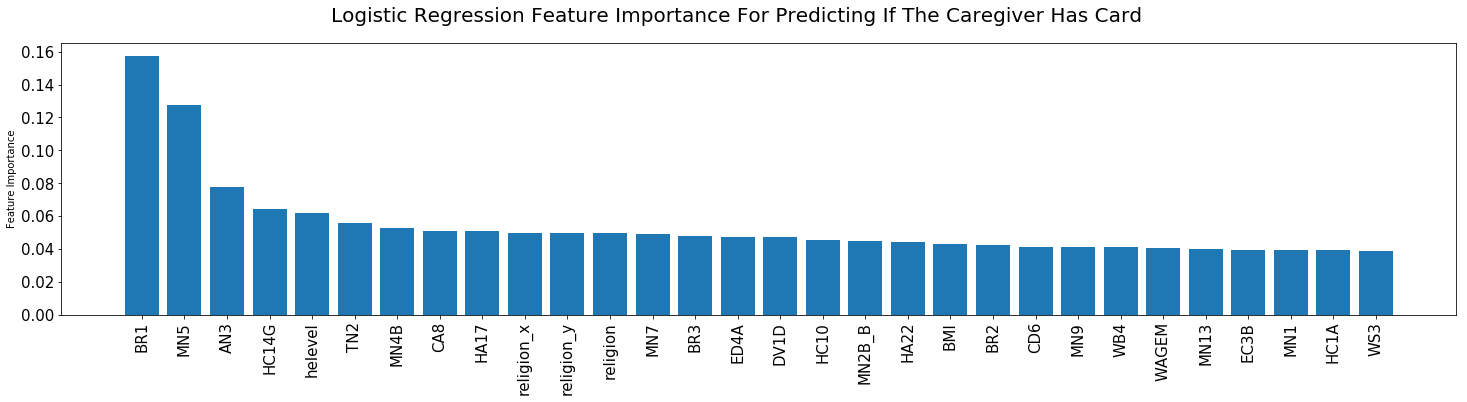

In [31]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [33]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.73      0.75      2335
          1       0.74      0.80      0.77      2275

avg / total       0.76      0.76      0.76      4610



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [34]:
#Training the Random Forests model

X_train, X_test, y_train, y_test = train_test_split(dummies[X],dummies[y].values.ravel(), test_size=0.3, random_state=0)

In [35]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


In [37]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81      2335
          1       0.81      0.78      0.80      2275

avg / total       0.80      0.80      0.80      4610



Let's validate the results of Random Forests Model with kfold cross validation

In [38]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.796


In [39]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [40]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [41]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

In [42]:
# Read the Labels File into a df
labels_df = pd.read_csv('label_nig.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [43]:
# Create a df with just the top 30 features
features_df = pd.DataFrame(feature_imp_data[0:30], columns=['name','Score'])
features_df.head()

,name,Score
0,HC1B,0.035184
1,AG1D,0.025717
2,religion_y,0.021395
3,HC1C,0.018506
4,CDOB,0.013701


In [44]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df[['name','label']],on='name', how='left')
final_df.to_csv("Features_RF_NIG.csv", encoding='utf-8', index=False)
final_df.head()

,name,Score,label
0,HC1B,0.035184,Mother tongue of household head
1,HC1B,0.035184,Mother tongue of household head
2,AG1D,0.025717,Day of birth of child
3,religion_y,0.021395,NaN
4,HC1C,0.018506,NaN


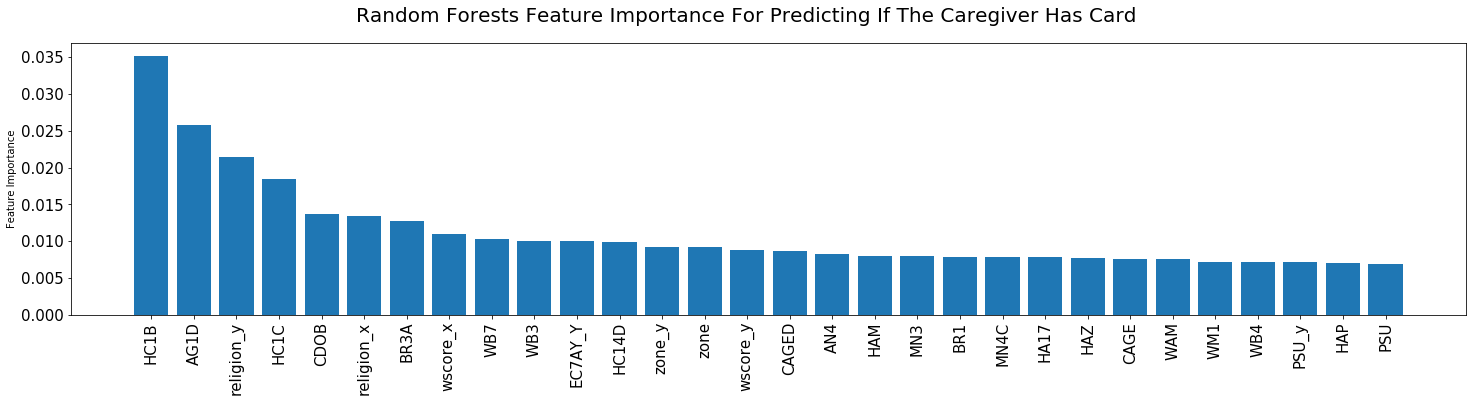

In [45]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

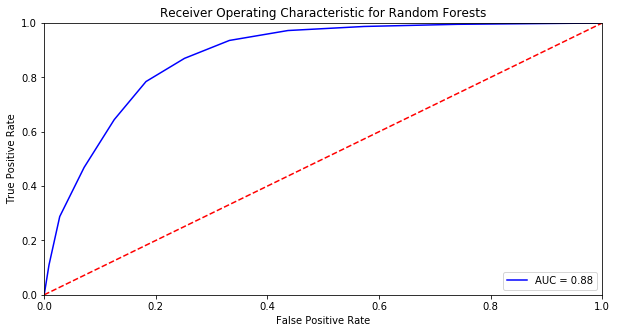

In [46]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [47]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [48]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.80


In [49]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.788


In [50]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [51]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [52]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

In [53]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.75      0.79      2335
          1       0.77      0.84      0.80      2275

avg / total       0.80      0.80      0.80      4610



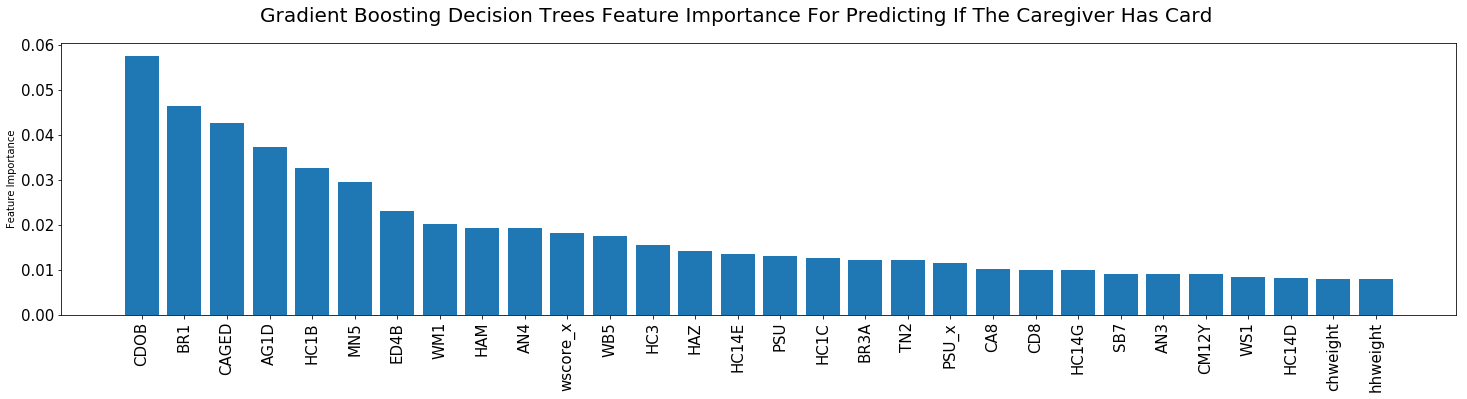

In [54]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

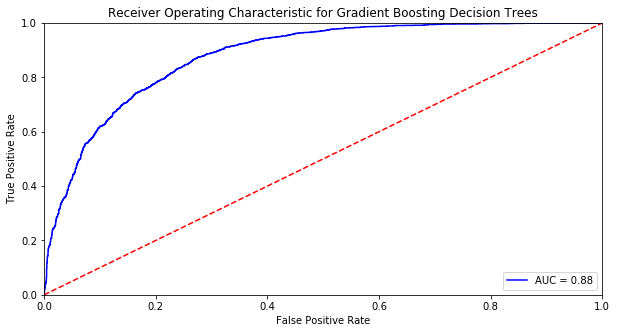

In [55]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gbd.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Gradient Boosting Decision Trees')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
# Create a df with just the top 30 features
features_df = pd.DataFrame(feature_imp_data[0:30], columns=['name','Score'])
features_df

,name,Score
0,CDOB,0.057578
1,BR1,0.046467
2,CAGED,0.042692
3,AG1D,0.037195
4,HC1B,0.032699
5,MN5,0.029520
6,ED4B,0.023043
7,WM1,0.020186
8,HAM,0.019295
9,AN4,0.019233


In [57]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df[['name','label']],on='name', how='left')
final_df = final_df.drop_duplicates()
final_df.to_csv("Features_GB.csv", encoding='utf-8', index=False)
final_df.head()

,name,Score,label
0,CDOB,0.057578,Date of birth of child (CMC)
1,BR1,0.046467,Birth certificate
2,CAGED,0.042692,Age in days
3,AG1D,0.037195,Day of birth of child
4,HC1B,0.032699,Mother tongue of household head
